<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DeepLearning/blob/main/04.Paper-with-code/ch04_03_Generative_Model_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.03 Generative Model - DCGAN

* 날짜:
* 이름:

## 학습내용
    - 딥러닝 생성모델에 대해 이해한다.
    - Deep Convolutional Generative Adversarial Networks 를 구현한다.

> https://arxiv.org/pdf/1406.2661.pdf



## 실습
---

### | **모델 구현**
<p  align='center'>
<img src ='https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0403-02.PNG?raw=true' width=800>
</p>

In [18]:
import tensorflow as tf
from tensorflow.keras import models, layers, utils

def build_gen(z_dim = 64, img_shape = (28, 28, 1)):
    h, w, c = img_shape
    # 길이가 (z_dim) 벡터
    z = layers.Input(shape = [z_dim] ) 
   
    y = layers.Dense( int(w/4) * int(h/4) * 8, activation = 'relu' )(z)
    y = layers.Reshape([int(w/4) , int(h/4), 8])(y)
    y = layers.BatchNormalization()(y)
    y = layers.Conv2DTranspose(16, kernel_size = 3, padding = 'same', strides = 2, activation = 'relu')(y) 
    y = layers.BatchNormalization()(y)
    
    # 크기가 img_shape = (h, w, c) 텐서
    y = layers.Conv2DTranspose(c, kernel_size = 3, padding = 'same', strides = 2, activation = 'sigmoid')(y)  
    
    return models.Model(z, y, name = 'Generator')

def build_dis(img_shape = (28, 28, 1)):
    x = layers.Input(shape = img_shape)
    y = layers.Conv2D(16, kernel_size = 3, strides = 2, padding = 'same', activation = 'relu')(x)
    y = layers.Dropout(.5)(y)
    y = layers.Conv2D(32, kernel_size = 3, strides = 2, padding = 'same', activation = 'relu')(y)
    y = layers.Dropout(.5)(y)
    y = layers.Flatten()(y)
    y = layers.Dense(128, activation = 'relu')(y)
    y = layers.Dropout(.5)(y)
    y = layers.Dense(1, activation = 'sigmoid')(y)

    return models.Model(x, y, name = 'Discriminator')

def build_gan(z_dim, img_shape):
    gen = build_gen(z_dim, img_shape)
    dis = build_dis(img_shape)

    z = layers.Input(shape = [z_dim] ) 
    fake_img = gen(z)
    logit = dis(fake_img)
    return models.Model(z, logit, name = 'GAN')

gan = build_gan(128, (32, 32, 3))
gan.summary()

Model: "GAN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 128)]             0         
                                                                 
 Generator (Functional)      (None, 32, 32, 3)         67747     
                                                                 
 Discriminator (Functional)  (None, 1)                 267489    
                                                                 
Total params: 335,236
Trainable params: 335,188
Non-trainable params: 48
_________________________________________________________________


(1, 64) (1, 28, 28, 1)


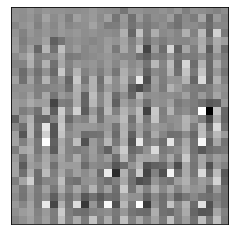

[[0.49847966]]


In [17]:
import matplotlib.pyplot as plt

z = tf.random.normal([1, 64])
fake_img = g.predict(z)
print(z.shape, fake_img.shape)
plt.imshow(fake_img[0, :, :, 0], cmap = 'gray'); plt.xticks([]); plt.yticks([])
plt.show()

logit = d.predict(fake_img)
print(logit)

### **| 학습**
<p  align='center'>
<img src ='https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0403-01.PNG?raw=true' width=600>
</p>